### Laboratorium 6 - zadania

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#### Zadanie

Dany jest obraz `pills`. Wykorzystaj transformację Hougha do detekcji linii, aby wykryć krawędzie między komórkami organizera. Wykorzystaj ulubiony detektor krawędzi i zaprezentuj wyniki pośrednie przed użyciem transformacji Hougha. Zapoznaj się z dokumentacją funkcji [`cv2.HoughLines`](https://docs.opencv.org/4.5.3/dd/d1a/group__imgproc__feature.html#ga46b4e588934f6c8dfd509cc6e0e4545a), zwłaszcza parametrami sterującymi rozdzielczością `rho`, `theta` oraz progiem `threshold` i przeanalizuj ich wpływ na osiągane wyniki.

Zacznij od znalezienia odpowiednich parametrów detektora krawędzi - jeśli na tym etapie wyniki będą słabe, to dalej będzie tylko gorzej (_garbage-in, garbage-out_) - ale nie skupiaj się na badaniu ich wpływu na wyniki.

Ostateczny rezultat zaprezentuj w postaci linii naniesionych na kopię obrazu wejściowego.

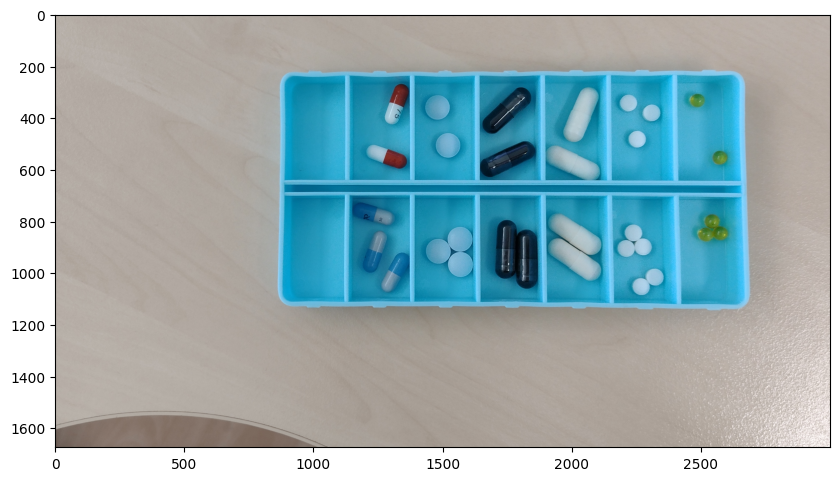

In [7]:
pills = cv2.imread('Data/calib.png')
plt.imshow(cv2.cvtColor(pills, cv2.COLOR_BGR2RGB));
plt.gcf().set_figwidth(10)
plt.gcf().set_figheight(10)

In [8]:
def rhotheta2xy(line):
    # to samo co w przykładzie tylko w formie funkcji - na potrzeby rysowania
    # zwraca współrzędne odcinka leżącego na pojedynczej linii
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 5000*(-b))
    y1 = int(y0 + 5000*(a))
    x2 = int(x0 - 5000*(-b))
    y2 = int(y0 - 5000*(a))
    return x1, y1, x2, y2

Rozwiązanie:

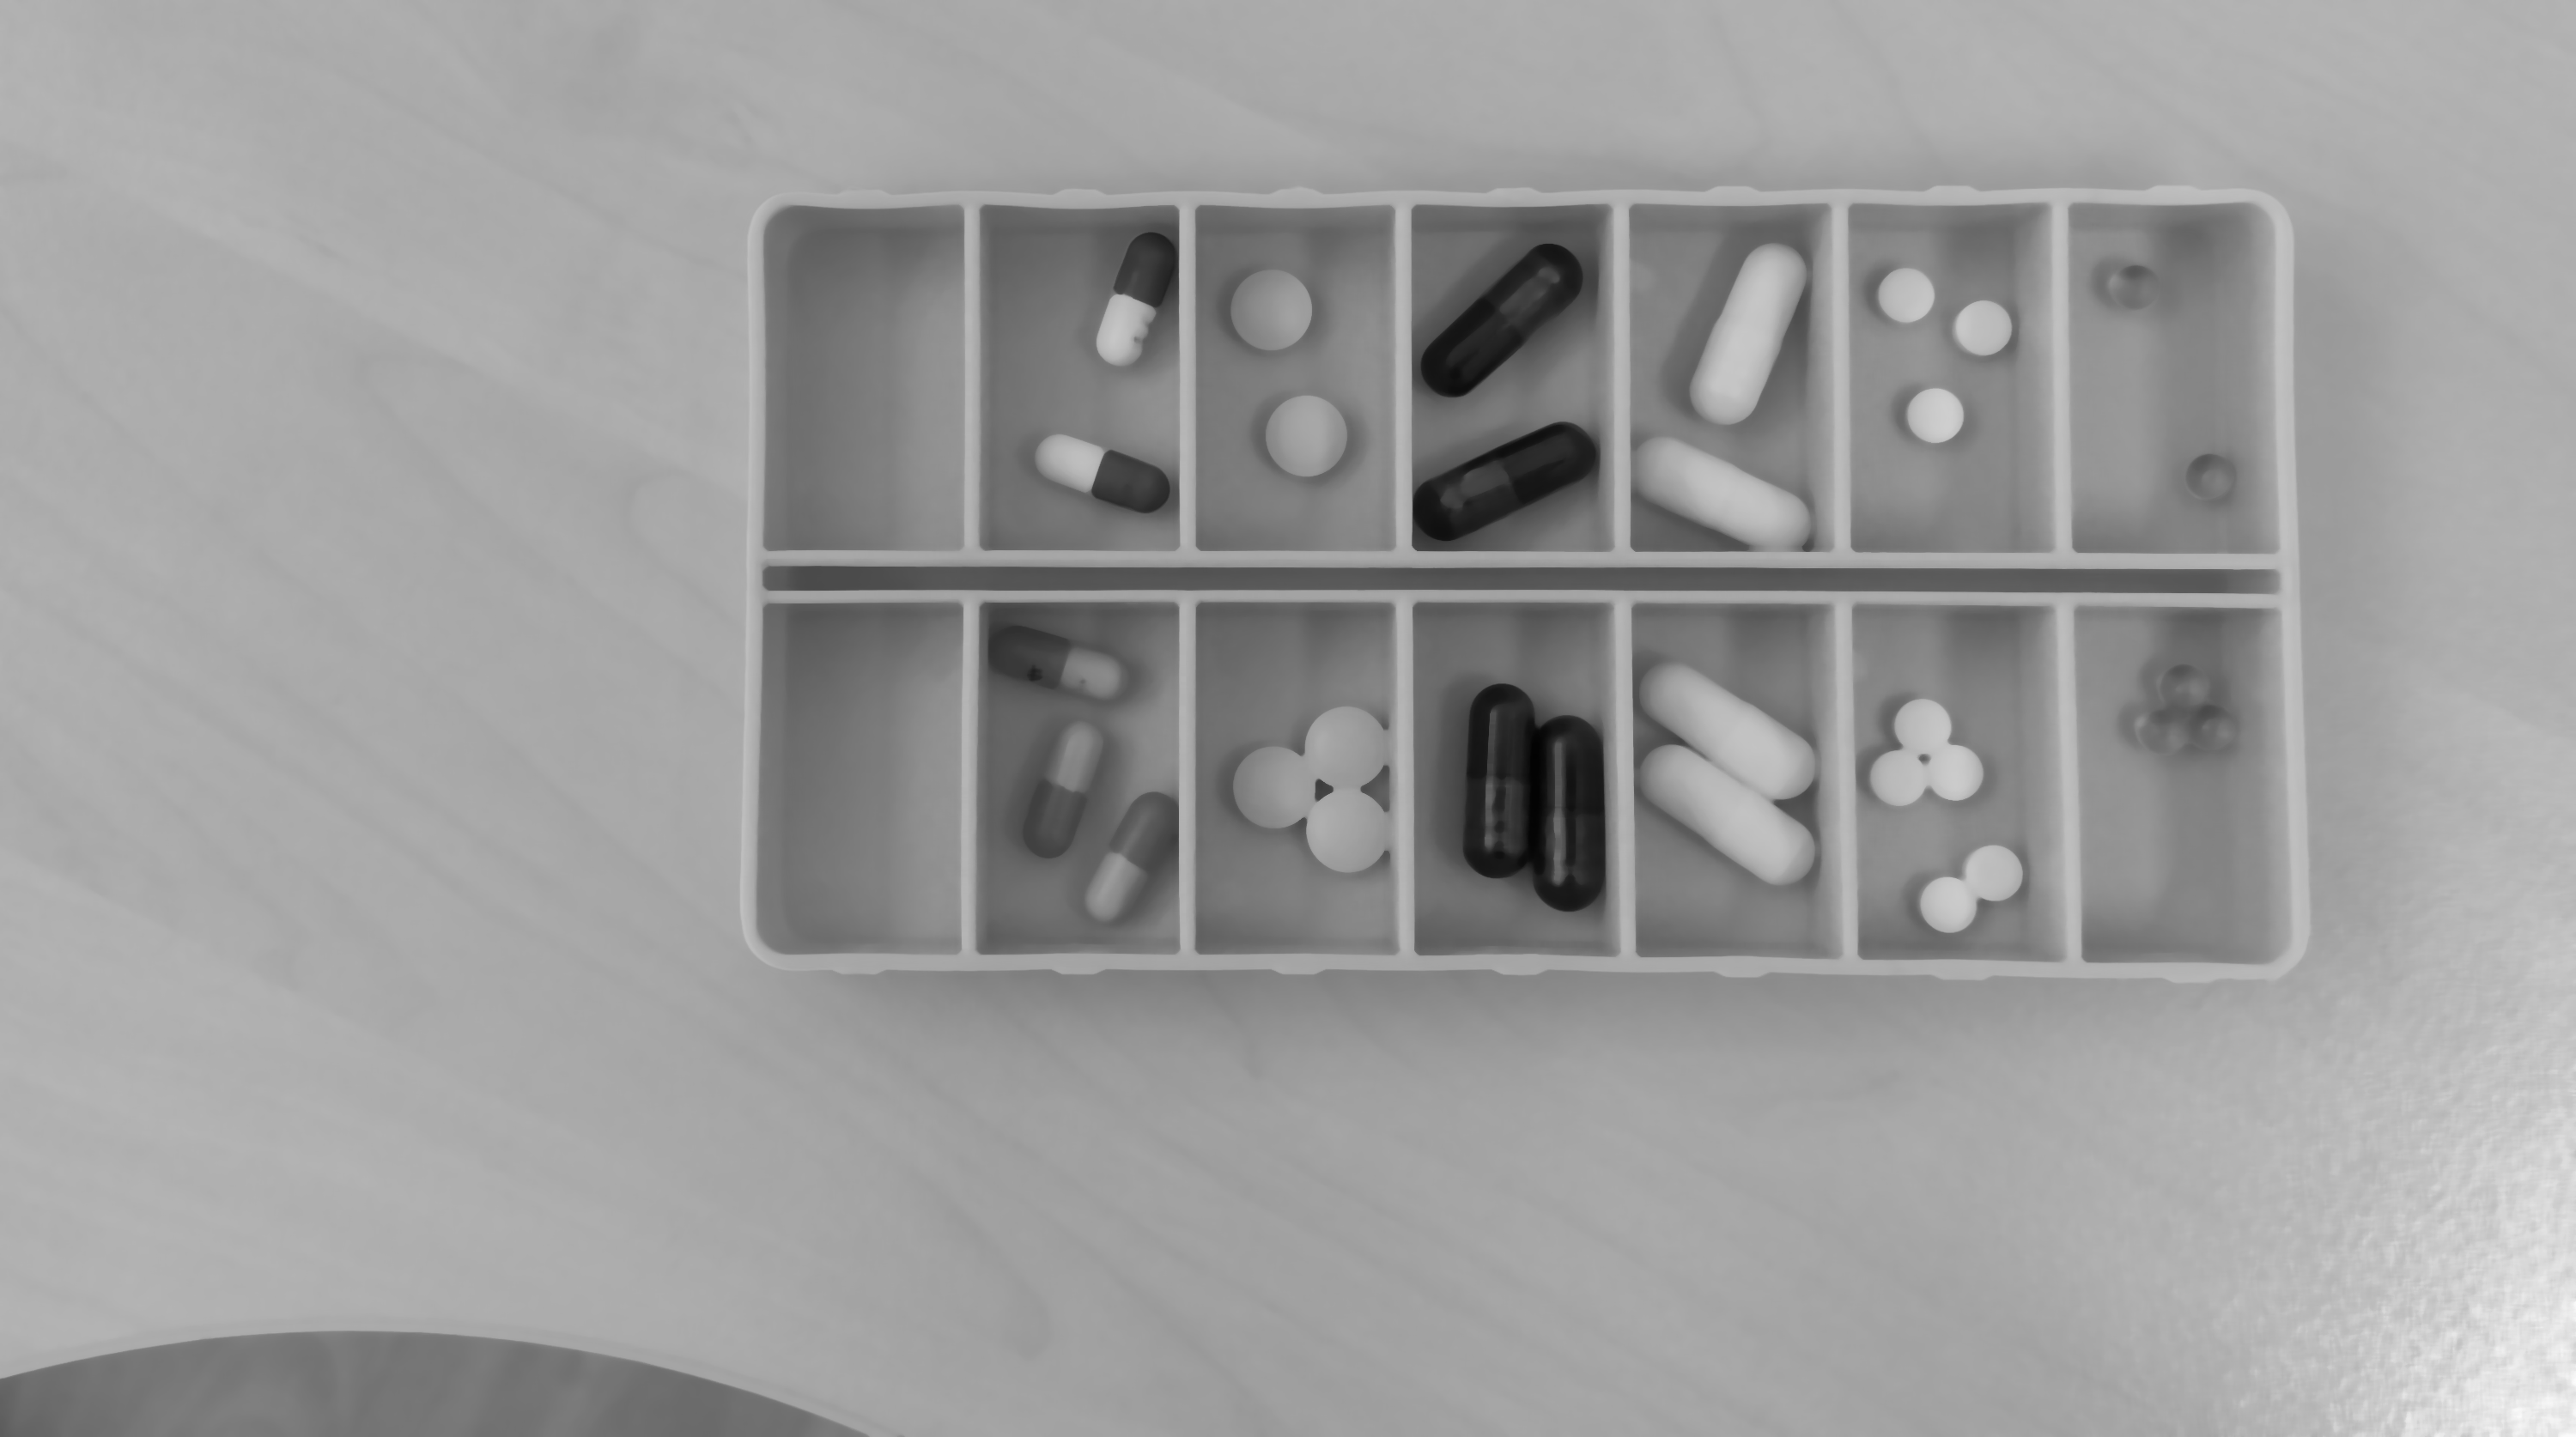

In [9]:
#Zmiana obarzu na obraz w skali szarości
pills_filtered = cv2.medianBlur(pills, 13)
pills_gray = cv2.cvtColor(pills_filtered, cv2.COLOR_BGR2GRAY)

Image.fromarray(pills_gray)

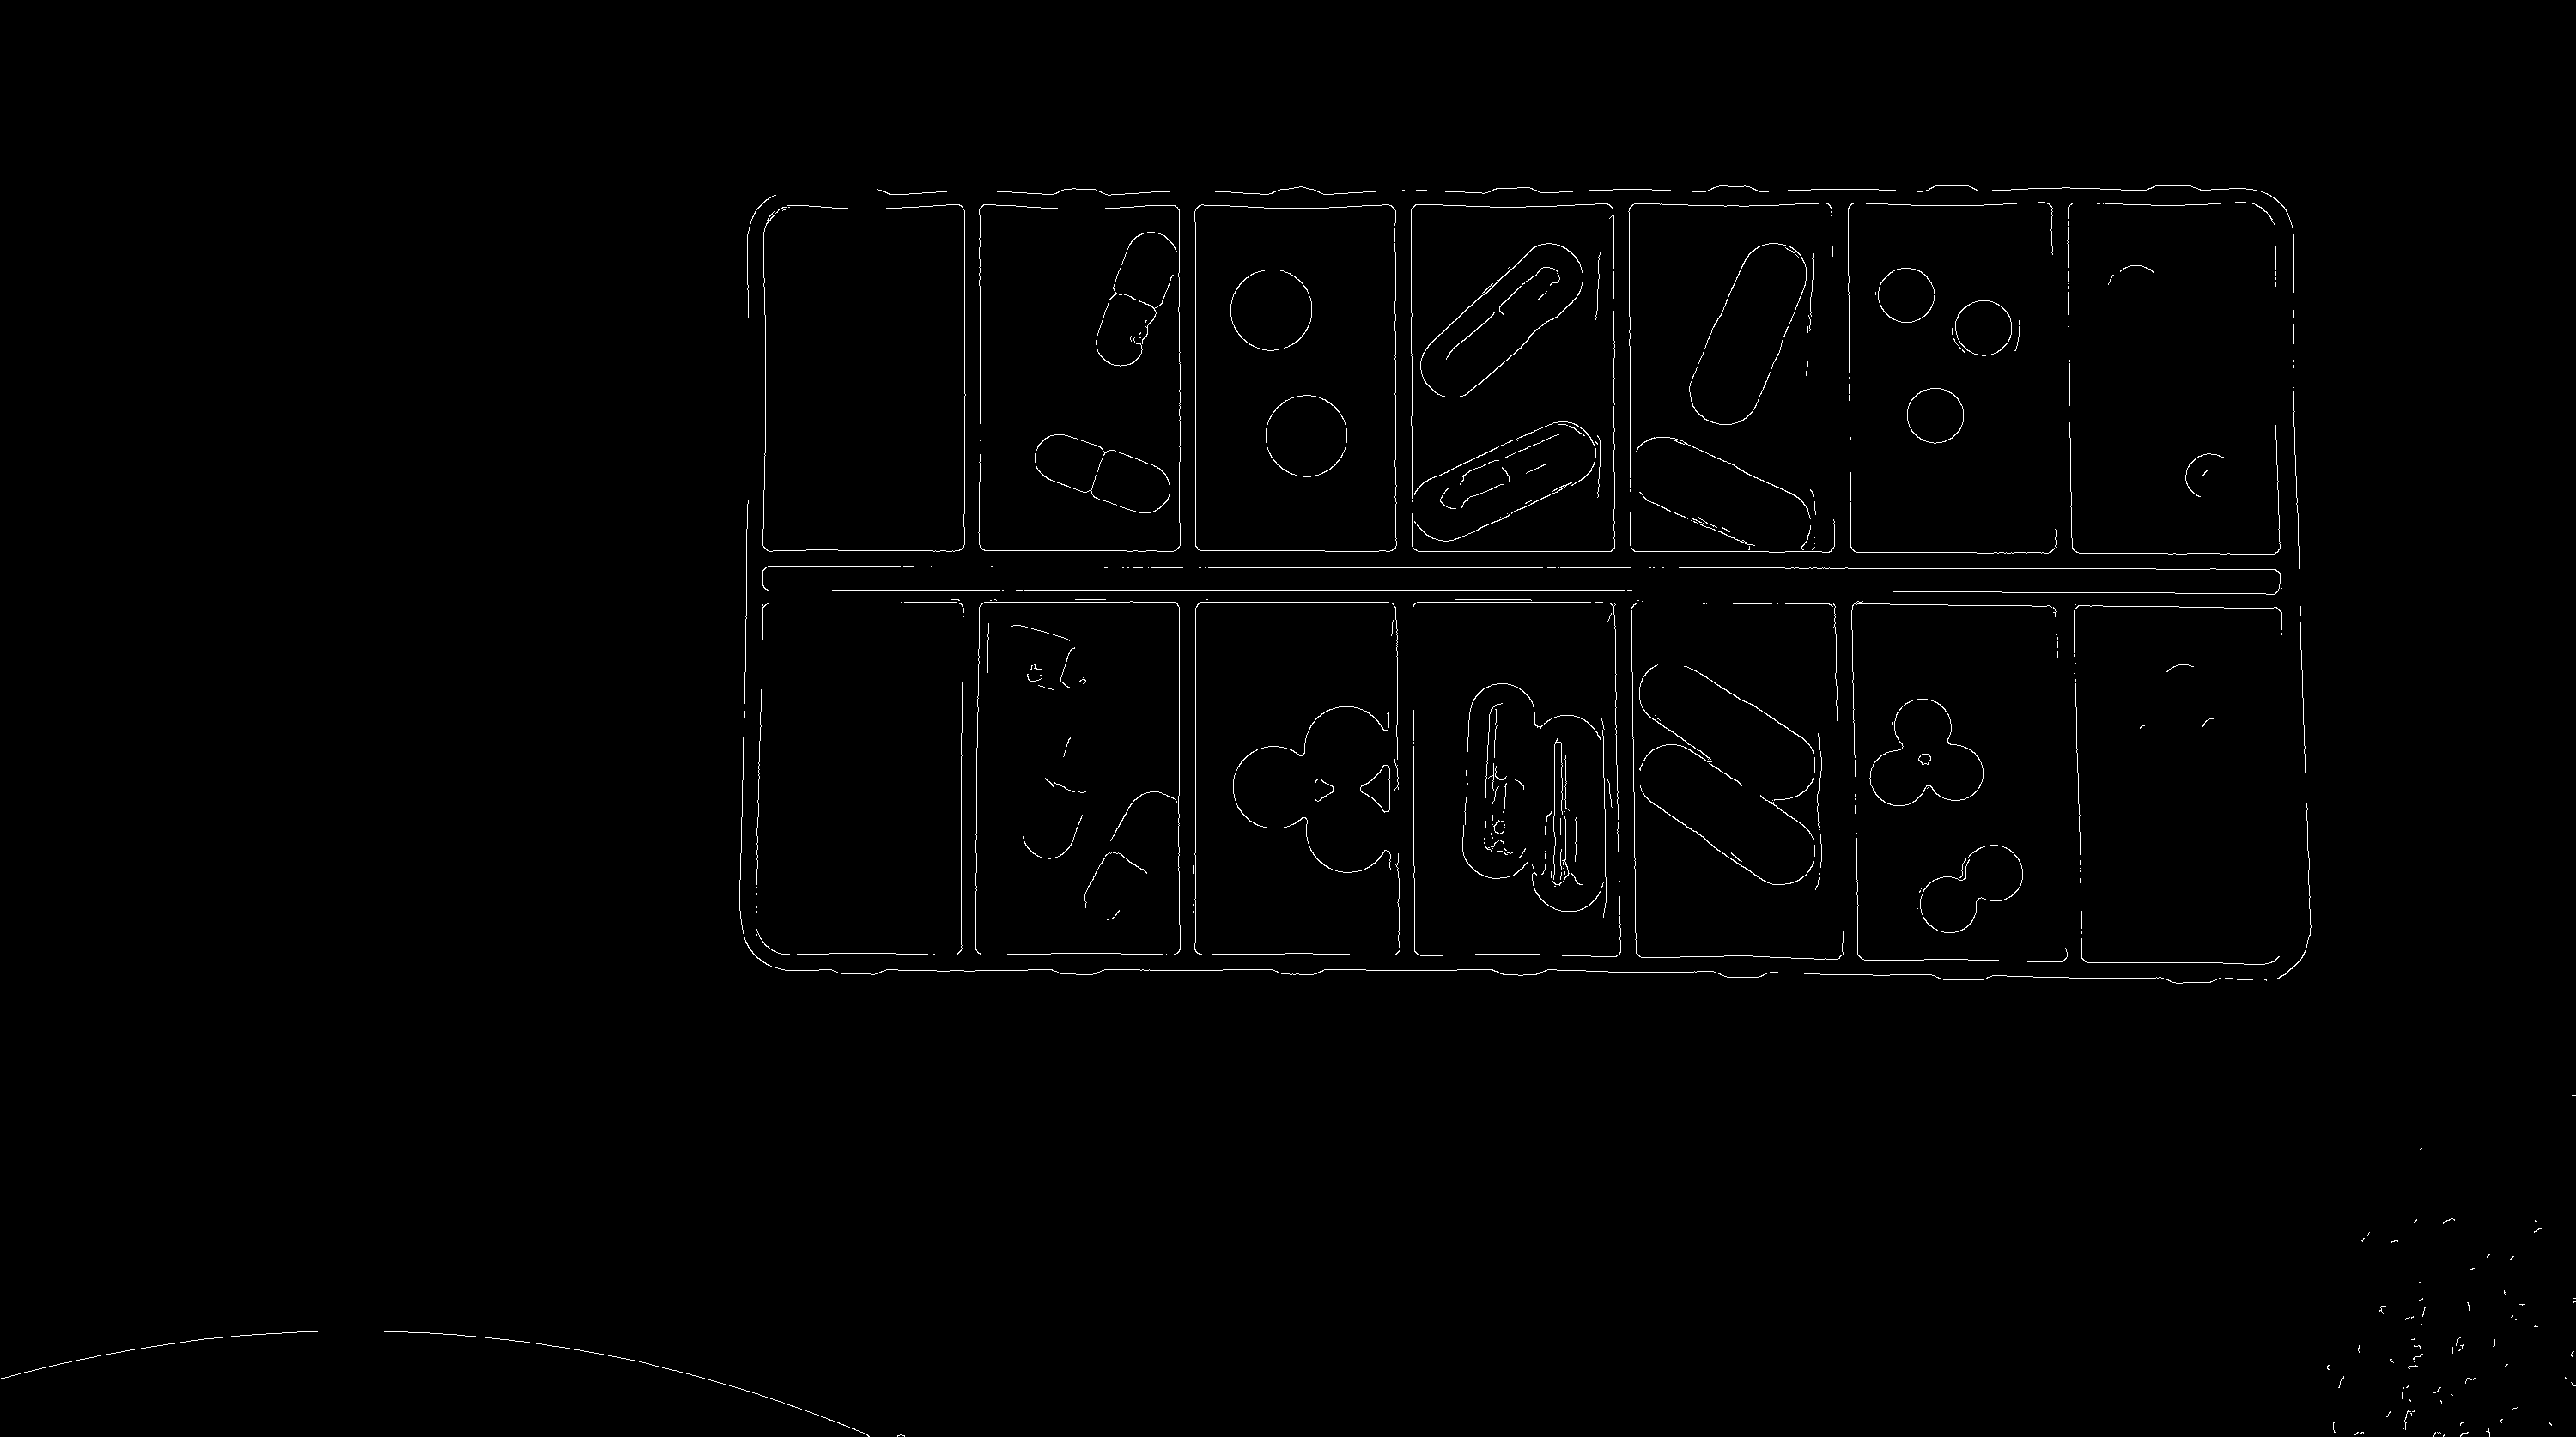

In [10]:
#Detekcja krawędzi metodą Canny'ego - wynik zależy od doboru wartości progów:
# kr_Canny = cv2.Canny(image=pills_gray, threshold1=60, threshold2=120)
kr_Canny = cv2.Canny(image=pills_gray, threshold1=40, threshold2=60)
Image.fromarray(kr_Canny)

theta:  1.5707963267948966


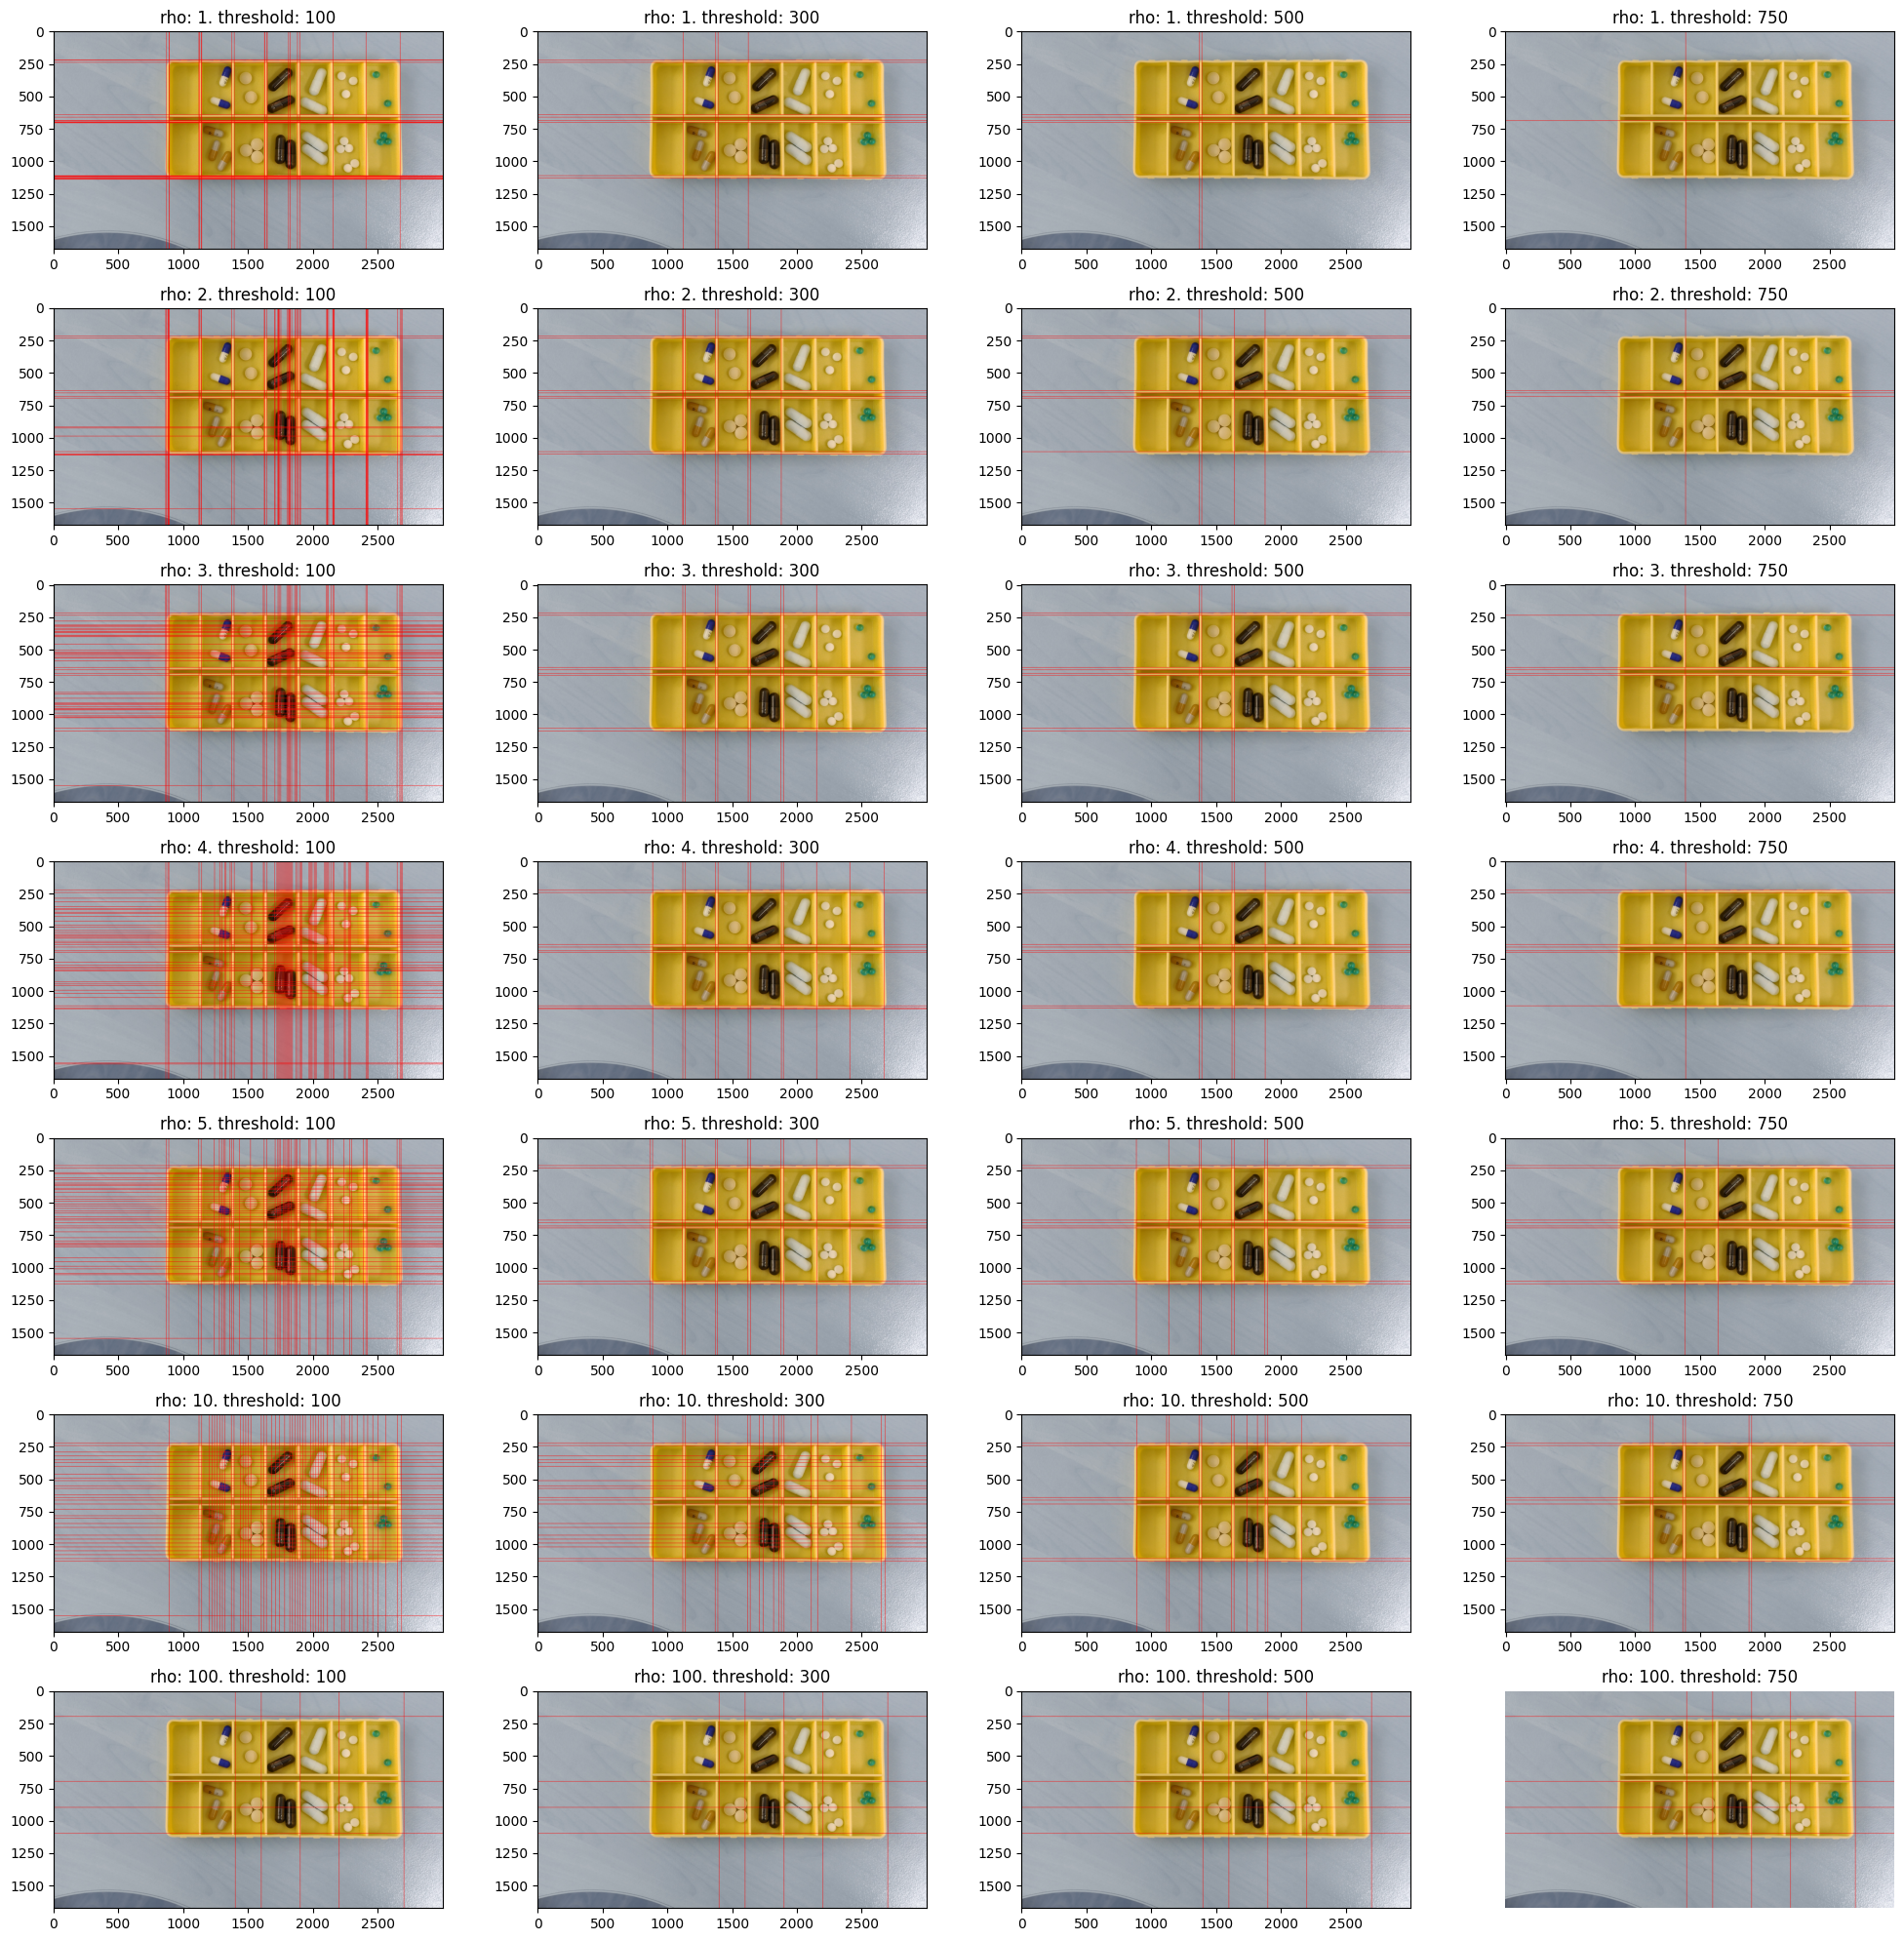

In [12]:
rhos = [1, 2, 3, 4, 5, 10, 100]
thresholds = [100, 300, 500, 750]
thetas = [np.pi/2]#[np.pi/90, np.pi/180, np.pi/360]
for theta in thetas:
    print('theta: ', theta)
    fig, ax = plt.subplots(len(rhos), len(thresholds), figsize=(20, 20))
    for i, rho in enumerate(rhos):
        for j, threshold in enumerate(thresholds):
            lines = cv2.HoughLines(kr_Canny, rho=rho, theta=theta, threshold=threshold)

            image_lines = pills.copy()
            #Aby narysować wyniki, przechodzimy ze współrzędnych rho-theta na XY
            for line in lines:
                x1, y1, x2, y2 = rhotheta2xy(line)
                cv2.line(image_lines, (x1,y1), (x2,y2), (255,0,0), 2)

            ax[i][j].imshow(image_lines)#Image.fromarray(image_lines)
            plt.axis('off')
            ax[i][j].set_title(f'rho: {rho}. threshold: {threshold}')
    plt.tight_layout()
    plt.show()

#### Zadanie dodatkowe (dla chętnych)

Dany jest obraz `coins`. Celem jest (1) przebadanie wpływu parametrów funkcji [`cv2.HoughCircles`](https://docs.opencv.org/4.5.3/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d) na znajdowane okręgi oraz (2) wykorzystanie transformacji Hougha do zliczenia monet znajdujących się na obrazie. Jak poprzednio, zacznij od uzyskania dobrej jakości detekcji krawędzi - natychmiast zauważysz, że im więcej na obrazie zakłóceń (tj. krawędzi nie będących interesującymi nas okręgami), tym gorsze będą rezultaty transformacji Hougha.  
Aby wyznaczyć sensowne wartości początkowe parametrów `HoughCircles`, przyjrzyj się geometrii obrazu - "na oko" przyjmij wartości `minDist`, `minRadius` i `maxRadius`; wybierz metodę `cv2.HOUGH_GRADIENT`, załóż $dp=1.5$ i przy tych wartościach znajdź wartość `param2`. Jeśli twój detektor krawędzi działa dobrze, parametr `param1` możesz wtedy pominąć.

Zwróć uwagę, że `cv2.HoughCircles` zwraca wynik w postaci zmiennoprzecinkowej `np.ndarray` o 3 wymiarach: (1, N, 3) gdzie N to liczba wykrytych okręgów a trójka liczb w ostatnim wymiarze odpowiada parametrom *x, y, r* wykrytego okręgu.

Zaprezentuj ostateczny wynik tak jak w zadaniu 1; do narysowania okręgów wykorzystaj funkcję [`cv2.circle`](https://docs.opencv.org/4.5.3/d6/d6e/group__imgproc__draw.html#gaf10604b069374903dbd0f0488cb43670) (pamiętaj, że oczekuje parametrów okręgu jako liczby całkowite!).

In [ ]:
coins = cv2.imread('Data/Coins.jpg')
plt.imshow(coins[..., ::-1]);
plt.gcf().set_figwidth(10)
plt.gcf().set_figheight(10)

Rozwiązanie:

In [ ]:
#Zmiana obarzu na obraz w skali szarości
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)

# Image.fromarray(coins_gray)

In [ ]:
plt.hist(coins_gray.flatten(), bins=255);

In [ ]:
#Detekcja krawędzi metodą Canny'ego - wynik zależy od doboru wartości progów:
kr_Canny = cv2.Canny(image=coins_gray, threshold1=252, threshold2=255)
Image.fromarray(kr_Canny)

In [ ]:
def rhotheta2xy(circle):
    # to samo co w przykładzie tylko w formie funkcji - na potrzeby rysowania
    # zwraca współrzędne odcinka leżącego na pojedynczej linii
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 5000*(-b))
    y1 = int(y0 + 5000*(a))
    x2 = int(x0 - 5000*(-b))
    y2 = int(y0 - 5000*(a))
    return x1, y1, x2, y2

In [ ]:
# def do_segmentation(img, sigmas = (0, 0.5, 1.0, 2.0), n_segments_list = (50, 100, 400), color=(1, 1, 0)):
#     fig, ax = plt.subplots(len(sigmas), len(n_segments_list), figsize=(20, 20))

#     for i, sigma in enumerate(sigmas):
#         for j, n_segments in enumerate(n_segments_list):
#             segmented_img = segment_image(img, sigma, n_segments, color)
#             ax[i][j].imshow(segmented_img) 
#             plt.axis('off')
#             ax[i][j].set_title(f'sigma: {sigma}. n_segments: {n_segments}')

#     plt.tight_layout()
#     plt.show()
param1s = [100, 110]
param2s = [115, 120, 125, 130]

fig, ax = plt.subplots(len(param2s), len(param1s), figsize=(20, 20))
for i, param2 in enumerate(param2s):
    for j, param1 in enumerate(param1s):
        if param1 >= param2:
            ax[i][j].set_title(f'Wrong parameters')
            continue
        circles = cv2.HoughCircles(coins_gray, 
            method=cv2.HOUGH_GRADIENT, 
            dp=1.5, 
            minDist=40, 
            param1=param1, 
            param2=param2,
            minRadius=40,
            maxRadius=90);

        image_circles = coins.copy()
        if circles is None:
            ax[i][j].set_title(f'Circles not found')
            continue
        circles = np.round(circles[0, :]).astype("int")
        #Aby narysować wyniki, przechodzimy ze współrzędnych rho-theta na XY
        for (x, y, r) in circles:
            # x, y = circle[0], circle[1]
            # r = circle[2]
            # print(circle)
            # print(x)
            # print(y)
            # print(r)
            cv2.circle(image_circles, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(image_circles, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

        ax[i][j].imshow(image_circles)#Image.fromarray(image_lines)
        plt.axis('off')
        ax[i][j].set_title(f'param1: {param1}. param2: {param2}. Znaleziono monet: {circles.shape[0]}')

plt.tight_layout()
plt.show()